In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans 

data_frame = pd.read_csv('study_plan.csv')
data_frame


,Gender,Age,What time do you wake up in the morning?,What time do you have breakfast?,Are you doing a job?,"If you have a job, how much time do you spend on it?",How much time do you spend on education?,What time do you have lunch?,What is your hobby?,How much time does it take?,What time do you have dinner?,What Is Your University?,What is your Faculty?,What is your academic year?,What has been your GPA in the last years?,How many repeats did you have Last year?,What time do you go to bed at night?,How long does it take for a university outdoor activity ?,How much time do you take for Lab Sessions and practical's?
0,Female,28,5.00,7.00,Yes,2 hours,4 hours,13.3,Watching Movie,3 hours,21.0,NSBM Green University,School of Computing,Year 04,2.70,1,22.00,2 hours,2 hours
1,Female,21,3.00,10.00,No,NaN,5 hours,14.0,Playing,2 hours,22.0,CINEC Campus Sri Lanka,School of Computing,Year 03,3.00,5,22.30,3 hours,2 hours
2,Male,22,4.00,7.00,Yes,5 hours,3 hours,12.0,other,1 hours,22.3,Horizon University,School of Law,Year 03,3.20,0,23.45,3 hours,6 hours
3,Male,27,2.00,8.00,No,NaN,7 hours,12.3,Watching Movie,4 hours,20.0,Sri Lanka Institute of Information Technology ...,School of Computing,Year 03,1.80,6,23.00,2 hours,5 hours
4,Male,23,1.00,7.30,Yes,6 hours,1 hours,13.3,Reading,2 hours,19.0,Sri Lanka Institute of Information Technology ...,School of Computing,Year 04,1.00,0,1.00,1 hours,4 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Male,27,7.45,8.45,Yes,6 hours,2 hours,15.3,other,3 hours,20.0,Sri Lanka Institute of Information Technology ...,School of Computing,Year 01,2.78,0,20.00,2 hours,6 hours
95,Female,23,10.00,11.00,No,NaN,7 hours,13.0,Playing,4 hours,20.3,Sri Lanka Institute of Information Technology ...,School of Computing,Year 03,2.96,7,1.45,5 hours,2 hours
96,Female,30,8.00,9.00,No,NaN,3 hours,13.3,Playing,5 hours,19.0,Sri Lanka Institute of Information Technology ...,School of Computing,Year 02,3.60,5,2.00,2 hours,2 hours
97,Male,19,9.00,10.00,Yes,8 hours,1 hours,12.3,Reading,3 hours,19.3,NSBM Green University,School of Business,Year 02,1.75,2,3.00,1 hours,4 hours


In [2]:
data_frame.shape

(99, 19)

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Gender                                                       99 non-null     object 
 1   Age                                                          99 non-null     int64  
 2   What time do you wake up in the morning?                     99 non-null     float64
 3   What time do you have breakfast?                             99 non-null     float64
 4   Are you doing a job?                                         99 non-null     object 
 5   If you have a job, how much time do you spend on it?         50 non-null     object 
 6   How much time do you spend on education?                     99 non-null     object 
 7   What time do you have lunch?                                 99 non-null     float

In [5]:
data_frame.isnull().sum()

Gender                                                          0
Age                                                             0
What time do you wake up in the morning?                        0
What time do you have breakfast?                                0
Are you doing a job?                                            0
If you have a job, how much time do you spend on it?           49
How much time do you spend on education?                        0
What time do you have lunch?                                    0
What is your hobby?                                             0
How much time does it take?                                     0
What time do you have dinner?                                   0
What Is Your University?                                        0
What is your Faculty?                                           0
What is your academic year?                                     0
What has been your GPA in the last years?                       0
How many r

In [6]:
data_frame['If you have a job, how much time do you spend on it?'].fillna(0, inplace=True)
data_frame["If you have a job, how much time do you spend on it?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame["How much time do you spend on education? "].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame["How much time does it take?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame["How long does it take for a university outdoor activity ?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame["How much time do you take for Lab Sessions and practical's?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame['What is your academic year?'].replace(["Year 01","Year 02","Year 03","Year 04",], [1,2,3,4],inplace=True)

data_frame.isnull().sum()
data_frame


,Gender,Age,What time do you wake up in the morning?,What time do you have breakfast?,Are you doing a job?,"If you have a job, how much time do you spend on it?",How much time do you spend on education?,What time do you have lunch?,What is your hobby?,How much time does it take?,What time do you have dinner?,What Is Your University?,What is your Faculty?,What is your academic year?,What has been your GPA in the last years?,How many repeats did you have Last year?,What time do you go to bed at night?,How long does it take for a university outdoor activity ?,How much time do you take for Lab Sessions and practical's?
0,Female,28,5.00,7.00,Yes,2,4,13.3,Watching Movie,3,21.0,NSBM Green University,School of Computing,4,2.70,1,22.00,2,2
1,Female,21,3.00,10.00,No,0,5,14.0,Playing,2,22.0,CINEC Campus Sri Lanka,School of Computing,3,3.00,5,22.30,3,2
2,Male,22,4.00,7.00,Yes,5,3,12.0,other,1,22.3,Horizon University,School of Law,3,3.20,0,23.45,3,6
3,Male,27,2.00,8.00,No,0,7,12.3,Watching Movie,4,20.0,Sri Lanka Institute of Information Technology ...,School of Computing,3,1.80,6,23.00,2,5
4,Male,23,1.00,7.30,Yes,6,1,13.3,Reading,2,19.0,Sri Lanka Institute of Information Technology ...,School of Computing,4,1.00,0,1.00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Male,27,7.45,8.45,Yes,6,2,15.3,other,3,20.0,Sri Lanka Institute of Information Technology ...,School of Computing,1,2.78,0,20.00,2,6
95,Female,23,10.00,11.00,No,0,7,13.0,Playing,4,20.3,Sri Lanka Institute of Information Technology ...,School of Computing,3,2.96,7,1.45,5,2
96,Female,30,8.00,9.00,No,0,3,13.3,Playing,5,19.0,Sri Lanka Institute of Information Technology ...,School of Computing,2,3.60,5,2.00,2,2
97,Male,19,9.00,10.00,Yes,8,1,12.3,Reading,3,19.3,NSBM Green University,School of Business,2,1.75,2,3.00,1,4


In [7]:
from sklearn.preprocessing import OneHotEncoder
lbl_1 = OneHotEncoder()
lbl_2 = LabelEncoder()

data_frame['Gender'] = lbl_2.fit_transform(data_frame['Gender'])
data_frame['Are you doing a job?'] = lbl_2.fit_transform(data_frame['Are you doing a job?'])

#kmean_ftr = pd.DataFrame(features.toarray())
#data_frame1 = data_frame

#data_frame1 
#data_conv.toarray()
#data_new = pd.DataFrame(data_conv.toarray())

In [8]:
ohe1 = lbl_1.fit_transform(data_frame[['What is your hobby?']])
#ohe1.toarray()
data_frame = data_frame.join(pd.DataFrame(ohe1.toarray(), columns=lbl_1.categories_))

ohe2 = lbl_1.fit_transform(data_frame[['What Is Your University?']])
#ohe2.toarray()
data_frame = data_frame.join(pd.DataFrame(ohe2.toarray(), columns=lbl_1.categories_))

ohe3 = lbl_1.fit_transform(data_frame[['What is your Faculty?']])
#ohe3.toarray()
data_frame = data_frame.join(pd.DataFrame(ohe3.toarray(), columns=lbl_1.categories_))


In [9]:
features = data_frame.drop(columns = ['What is your hobby?', 'What Is Your University?', 'What is your Faculty?'], axis=1)
features.to_csv('chek.csv')
features


,Gender,Age,What time do you wake up in the morning?,What time do you have breakfast?,Are you doing a job?,"If you have a job, how much time do you spend on it?",How much time do you spend on education?,What time do you have lunch?,How much time does it take?,What time do you have dinner?,...,"(National Institute of Business Management,)","(Rajarata university,)","(Sri Lanka Institute of Information Technology (SLIIT),)","(School of Architecture,)","(School of Business,)","(School of Computing,)","(School of Engineering,)","(School of Hospitality,)","(School of Law,)","(School of Media Studies,)"
0,0,28,5.00,7.00,1,2,4,13.3,3,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,21,3.00,10.00,0,0,5,14.0,2,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,22,4.00,7.00,1,5,3,12.0,1,22.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,27,2.00,8.00,0,0,7,12.3,4,20.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,23,1.00,7.30,1,6,1,13.3,2,19.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,27,7.45,8.45,1,6,2,15.3,3,20.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
95,0,23,10.00,11.00,0,0,7,13.0,4,20.3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
96,0,30,8.00,9.00,0,0,3,13.3,5,19.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,1,19,9.00,10.00,1,8,1,12.3,3,19.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    
    wcss.append(kmeans.inertia_)

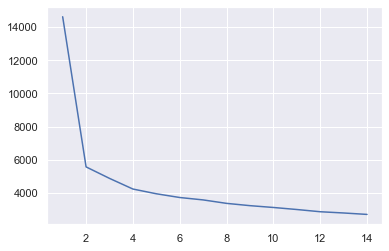

In [11]:
sns.set()
plt.plot(range(1,15), wcss)

In [12]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

lbl = kmeans.fit_predict(features)
lbl

array([3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 2, 0, 2, 2, 1, 1, 1, 3, 0, 2, 1,
       3, 3, 2, 0, 1, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 0, 3, 1, 3, 3, 3, 3,
       1, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 0, 3, 1, 3, 3, 0, 1, 3, 1, 3, 3,
       3, 1, 0, 2, 0, 2, 3, 1, 3, 2, 2, 0, 2, 2, 0, 2, 1, 1, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 3, 1, 2, 2, 0, 2], dtype=int32)

In [13]:
if(lbl[0] == 0):
    print("Study Plan No 1")


elif(lbl[0] == 1):
    print("Study Plan No 2")


elif(lbl[0] == 2):
    print("Study Plan No 3")

    
elif (lbl[0] == 3):
    print("Study Plan No 4")

Study Plan No 4


In [14]:
import pickle

trn_model = 'kmean_model.sav'
pickle.dump(kmeans, open(trn_model, 'wb'))


In [15]:
load_model = pickle.load(open('kmean_model.sav', 'rb'))

In [16]:
data_frame1 = pd.read_csv('study_plan1.csv')
data_frame1

data_frame1['If you have a job, how much time do you spend on it?'].fillna(0, inplace=True)
data_frame1["If you have a job, how much time do you spend on it?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame1["How much time do you spend on education? "].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame1["How much time does it take?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame1["How long does it take for a university outdoor activity ?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame1["How much time do you take for Lab Sessions and practical's?"].replace(["1 hours","2 hours","3 hours","4 hours","5 hours","6 hours","7 hours","8 hours","9 hours","10 hours","11 hours","12 hours","13 hours","14 hours","15 hours","16 hours",],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
data_frame1['What is your academic year?'].replace(["Year 01","Year 02","Year 03","Year 04",], [1,2,3,4],inplace=True)

data_frame1['Gender'].replace(["Male","Female",], [1,0],inplace=True)
data_frame1['Are you doing a job?'].replace(["Yes","No",], [1,0],inplace=True)



In [17]:
test1 = data_frame1["What is your hobby?"]
test2 = data_frame1['What Is Your University?']
test3 = data_frame1['What is your Faculty?']

test1=test1.to_numpy()
test2=test2.to_numpy()
test3=test3.to_numpy()


if (test1 == "Reading"):
    print('okay')
    
    data = {'Playing': [0],'Reading': [1],'Watching Movie': [0],'other': [0]}
    data_frame1=data_frame1.join(pd.DataFrame(data))
    
elif(test1 == "Playing"):   
    
    data = {'Playing': [1],'Reading': [0],'Watching Movie': [0],'other': [0]}
    data_frame1=data_frame1.join(pd.DataFrame(data))
    
elif(test1 == "Watching Movie"):   
    
    data = {'Playing': [0],'Reading': [0],'Watching Movie': [1],'other': [0]}
    data_frame1=data_frame1.join(pd.DataFrame(data))   
    
elif(test1 == "other"):   
    
    data = {'Playing': [0],'Reading': [0],'Watching Movie': [0],'other': [1]}
    data_frame1=data_frame1.join(pd.DataFrame(data))     

    
data_frame1

okay


,Gender,Age,What time do you wake up in the morning?,What time do you have breakfast?,Are you doing a job?,"If you have a job, how much time do you spend on it?",How much time do you spend on education?,What time do you have lunch?,What is your hobby?,How much time does it take?,...,What is your academic year?,What has been your GPA in the last years?,How many repeats did you have Last year?,What time do you go to bed at night?,How long does it take for a university outdoor activity ?,How much time do you take for Lab Sessions and practical's?,Playing,Reading,Watching Movie,other
0,1,19,9,10,1,8,1,12.3,Reading,3,...,2,1.75,2,3,1,4,0,1,0,0


In [18]:
if (test2 == "CINEC Campus Sri Lanka"):
    print('okay')
    
    data1 = {'CINEC Campus Sri Lanka': [1],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [0],'Horizon University': [0],'NSBM Green University':[0],'National Institute of Business Management':[0],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1))
    
elif(test2 == "ESOFT Metro Campus"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [1],'General Sir John Kotelawala Defence University': [0],'Horizon University': [0],'NSBM Green University':[0],'National Institute of Business Management':[0],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1))
    
elif(test2 == "General Sir John Kotelawala Defence University"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [1],'Horizon University': [0],'NSBM Green University':[0],'National Institute of Business Management':[0],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1))
    
elif(test2 == "Horizon University"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [0],'Horizon University': [1],'NSBM Green University':[0],'National Institute of Business Management':[0],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1))
    
elif(test2 == "NSBM Green University"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [0],'Horizon University': [0],'NSBM Green University':[1],'National Institute of Business Management':[0],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1)) 
      
elif(test2 == "National Institute of Business Management"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [0],'Horizon University': [0],'NSBM Green University':[0],'National Institute of Business Management':[1],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1))  
    
elif(test2 == "Rajarata university"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [0],'Horizon University': [0],'NSBM Green University':[0],'National Institute of Business Management':[0],'Rajarata university':[1],'Sri Lanka Institute of Information Technology (SLIIT)':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data1)) 
    
elif(test2 == "Sri Lanka Institute of Information Technology (SLIIT)"):
    data1 = {'CINEC Campus Sri Lanka': [0],'ESOFT Metro Campus': [0],'General Sir John Kotelawala Defence University': [0],'Horizon University': [0],'NSBM Green University':[0],'National Institute of Business Management':[0],'Rajarata university':[0],'Sri Lanka Institute of Information Technology (SLIIT)':[1]}
    data_frame1=data_frame1.join(pd.DataFrame(data1))   
    
data_frame1
    

,Gender,Age,What time do you wake up in the morning?,What time do you have breakfast?,Are you doing a job?,"If you have a job, how much time do you spend on it?",How much time do you spend on education?,What time do you have lunch?,What is your hobby?,How much time does it take?,...,Watching Movie,other,CINEC Campus Sri Lanka,ESOFT Metro Campus,General Sir John Kotelawala Defence University,Horizon University,NSBM Green University,National Institute of Business Management,Rajarata university,Sri Lanka Institute of Information Technology (SLIIT)
0,1,19,9,10,1,8,1,12.3,Reading,3,...,0,0,0,0,0,0,1,0,0,0


In [19]:
if (test3 == "School of Architecture"):
    print('okay')
    
    data2 = {'School of Architecture': [1],'School of Business': [0],'School of Computing': [0],'School of Engineering': [0],'School of Hospitality':[0],'School of Law':[0],'School of Media Studies':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data2))
    
elif(test3 == "School of Business"):
    data2 = {'School of Architecture': [0],'School of Business': [1],'School of Computing': [0],'School of Engineering': [0],'School of Hospitality':[0],'School of Law':[0],'School of Media Studies':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data2))
    
elif(test3 == "School of Computing"):
    data2 = {'School of Architecture': [0],'School of Business': [0],'School of Computing': [1],'School of Engineering': [0],'School of Hospitality':[0],'School of Law':[0],'School of Media Studies':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data2))
    
elif(test3 == "School of Engineering"):
    data2 = {'School of Architecture': [0],'School of Business': [0],'School of Computing': [0],'School of Engineering': [1],'School of Hospitality':[0],'School of Law':[0],'School of Media Studies':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data2))
    
elif(test3 == "School of Hospitality"):
    data2 = {'School of Architecture': [0],'School of Business': [0],'School of Computing': [0],'School of Engineering': [0],'School of Hospitality':[1],'School of Law':[0],'School of Media Studies':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data2)) 
      
elif(test3 == "School of Law"):
    data2 = {'School of Architecture': [0],'School of Business': [0],'School of Computing': [0],'School of Engineering': [0],'School of Hospitality':[0],'School of Law':[1],'School of Media Studies':[0]}
    data_frame1=data_frame1.join(pd.DataFrame(data2)) 
    
elif(test3 == "School of Media Studies"):
    data2 = {'School of Architecture': [0],'School of Business': [0],'School of Computing': [0],'School of Engineering': [0],'School of Hospitality':[0],'School of Law':[0],'School of Media Studies':[1]}
    data_frame1=data_frame1.join(pd.DataFrame(data2)) 
    

    
data_frame1

,Gender,Age,What time do you wake up in the morning?,What time do you have breakfast?,Are you doing a job?,"If you have a job, how much time do you spend on it?",How much time do you spend on education?,What time do you have lunch?,What is your hobby?,How much time does it take?,...,National Institute of Business Management,Rajarata university,Sri Lanka Institute of Information Technology (SLIIT),School of Architecture,School of Business,School of Computing,School of Engineering,School of Hospitality,School of Law,School of Media Studies
0,1,19,9,10,1,8,1,12.3,Reading,3,...,0,0,0,0,1,0,0,0,0,0


In [20]:
features1 = data_frame1.drop(columns = ['What is your hobby?', 'What Is Your University?', 'What is your Faculty?'], axis=1)
features1.to_csv('chek_next.csv')
input_data_np_array = np.asarray(features1)
input_data_reshape = input_data_np_array.reshape(1,-1)
prediction = load_model.predict(input_data_reshape)
prediction

array([0], dtype=int32)

In [21]:
if(prediction == 0):
    print("Study Plan No 1")


elif(prediction == 1):
    print("Study Plan No 2")


elif(prediction == 2):
    print("Study Plan No 3")

    
elif (prediction == 3):
    print("Study Plan No 4")

Study Plan No 1
